### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
diabetes_data = pd.read_csv('dataset/PimaIndians_processed.csv')

diabetes_data.head(10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1
5,0.529718,1.407219,0.107109,-0.965953,0.159608,-1.038117,0.185349,1.976412,1
6,-1.029213,-0.150141,1.068636,1.699951,0.623000,1.811417,0.081015,0.013271,1
7,-0.717427,-0.636816,-3.258237,0.843053,-0.615520,1.455225,-0.985506,0.209585,0
8,-0.717427,-0.247476,-0.053146,0.081366,-0.505991,0.215678,0.017256,0.111428,1
9,-0.093854,0.109419,1.389146,1.128686,0.665127,0.885318,0.524433,-0.379357,0


In [3]:
FEATURES = list(diabetes_data.columns[:-1])

FEATURES

['pregnant',
 'glucose',
 'diastolic',
 'triceps',
 'insulin',
 'bmi',
 'diabetes',
 'age']

### Apply PCA
* PCA: Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* explained_variance_ : The amount of variance explained by each of the selected components.
* components_ : Principal axes in feature space, representing the directions of maximum variance in the data.
* fit_transform : Fit the model with X and apply the dimensionality reduction on X

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [41]:
from sklearn.decomposition import PCA

def apply_pcs(n):
    
    pca = PCA(n_components = n) 
    x_new = pca.fit_transform(diabetes_data[FEATURES])
        
    return pca, pd.DataFrame(x_new)

In [42]:
pca_obj, _ = apply_pca(8)

In [43]:
print("Explained Variance:", pca_obj.explained_variance_ratio_)

Explained Variance: [0.31994031 0.19459756 0.14984544 0.11946188 0.09002175 0.05017765
 0.03888422 0.03707119]


In [44]:
sum(pca_obj.explained_variance_ratio_)

1.0

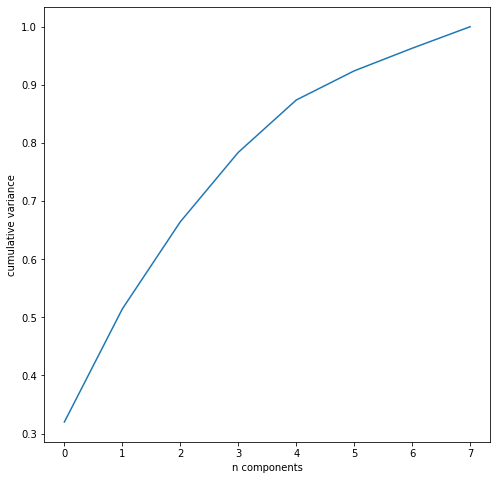

In [45]:
plt.figure(figsize = (8, 8))

plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [46]:
Y = diabetes_data['test']

In [47]:
_ , X_new = apply_pca(4)

In [48]:
X_new.sample(10)

,0,1,2,3
268,-2.639143,-0.720698,0.392588,-0.348852
54,-2.016449,-1.126717,-0.432465,-0.651791
310,2.021900,2.185068,1.520353,0.699773
318,-3.257839,-1.097613,-0.338189,-0.013154
0,-2.059077,0.090379,-0.308834,-0.700160
109,-1.465557,0.570022,-1.432326,-0.989619
37,1.797593,-2.426837,-1.439957,0.018173
183,1.069368,-0.591353,-1.078032,-1.454069
85,1.943033,-0.568305,0.106681,0.567061
40,-0.973291,-0.336180,0.498180,0.072122


In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [51]:
y_pred = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [53]:
accuracy_score(y_test, y_pred)

0.7468354430379747

In [54]:
precision_score(y_test, y_pred)

0.7083333333333334

In [55]:
recall_score(y_test, y_pred)

0.5666666666666667